In [1]:
%run import_util.py
import scan_api
import util

START loading util functions
DONE loading util functions


In [2]:
# set the data folder to work on
util.data_directory="./data/"
print(util.data_directory)
n=2
n1=10

./data/


Read all Data

In [3]:
covid=util.read_file("generated_data/covid_latest.csv")
malaria=util.read_file("generated_data/malaria.csv")
population=util.read_file("generated_data/world_population.csv")
bcg=util.read_file("generated_data/bcg_coverage.csv")

# Start EDA

In [4]:
countryList=util.countryList
# check if all country data present
print("countryList length : ",len(countryList))
print("population_df has : ",len(population[population['country'].isin(countryList)]))
print("covid_df has : ",len(covid[covid['country'].isin(countryList)]))
print("bcg_df has : ",len(bcg[bcg['country'].isin(countryList)]))
print("malaria_df has : ",len(malaria[malaria['country'].isin(countryList)]))


countryList length :  23
population_df has :  23
covid_df has :  23
bcg_df has :  15
malaria_df has :  5


In [5]:
display(population.head(n))
display(covid.head(n))
display(bcg.head(n))
display(malaria.head(n))

,country,poptotal_young,poptotal_old,poptotal,young_perc,old_perc
0,Afghanistan,37897.103,1031.238,38928.341,0.973509,0.026491
1,Albania,2454.631,423.169,2877.800,0.852954,0.147046


,country,covid_deaths,covid_cases,covid_recovered
0,Afghanistan,4,170,2
1,Albania,11,223,44


,country,bcg_coverage_latest,bcg_coverage_mean,bcg_coverage_max
0,Afghanistan,0.0,0.0,0.0
1,Albania,0.0,13.4,99.5


,country,malaria_cases,malaria_cases_mean,malaria_cases_max
0,Afghanistan,54840.0,146317.0,415356.0
1,Algeria,59.0,13.0,59.0


In [6]:
display(population.info())
display(covid.info())
display(bcg.info())
display(malaria.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
country           201 non-null object
poptotal_young    201 non-null float64
poptotal_old      201 non-null float64
poptotal          201 non-null float64
young_perc        201 non-null float64
old_perc          201 non-null float64
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
country            178 non-null object
covid_deaths       178 non-null int64
covid_cases        178 non-null int64
covid_recovered    178 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 4 columns):
country                177 non-null object
bcg_coverage_latest    177 non-null float64
bcg_coverage_mean      177 non-null float64
bcg_coverage_max       177 non-null float64
dtypes: float64(3), object(1)
memory usage: 5.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
country               95 non-null object
malaria_cases         95 non-null float64
malaria_cases_mean    95 non-null float64
malaria_cases_max     95 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.0+ KB


None

In [7]:
covid_population=pd.merge(covid,population,on=["country"],how="left")

covid_population['covid_deaths_perc']=(covid_population['covid_deaths']*100)/(covid_population['poptotal']*1000)
covid_population['covid_cases_perc']=(covid_population['covid_cases']*100)/(covid_population['poptotal']*1000)
covid_population['covid_recovered_perc']=(covid_population['covid_recovered']*100)/(covid_population['poptotal']*1000)

display(covid_population.head(n))
covid_population.info()
display(covid_population.isnull().sum())

,country,covid_deaths,covid_cases,covid_recovered,poptotal_young,poptotal_old,poptotal,young_perc,old_perc,covid_deaths_perc,covid_cases_perc,covid_recovered_perc
0,Afghanistan,4,170,2,37897.103,1031.238,38928.341,0.973509,0.026491,0.000010,0.000437,0.000005
1,Albania,11,223,44,2454.631,423.169,2877.800,0.852954,0.147046,0.000382,0.007749,0.001529


<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 12 columns):
country                 178 non-null object
covid_deaths            178 non-null int64
covid_cases             178 non-null int64
covid_recovered         178 non-null int64
poptotal_young          161 non-null float64
poptotal_old            161 non-null float64
poptotal                161 non-null float64
young_perc              161 non-null float64
old_perc                161 non-null float64
covid_deaths_perc       161 non-null float64
covid_cases_perc        161 non-null float64
covid_recovered_perc    161 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 18.1+ KB


country                  0
covid_deaths             0
covid_cases              0
covid_recovered          0
poptotal_young          17
poptotal_old            17
poptotal                17
young_perc              17
old_perc                17
covid_deaths_perc       17
covid_cases_perc        17
covid_recovered_perc    17
dtype: int64

In [8]:
covid_bcg=pd.merge(covid_population,bcg,on=["country"],how="left")

display(covid_bcg.head(n))
covid_bcg.info()
display(covid_bcg.isnull().sum())

,country,covid_deaths,covid_cases,covid_recovered,poptotal_young,poptotal_old,poptotal,young_perc,old_perc,covid_deaths_perc,covid_cases_perc,covid_recovered_perc,bcg_coverage_latest,bcg_coverage_mean,bcg_coverage_max
0,Afghanistan,4,170,2,37897.103,1031.238,38928.341,0.973509,0.026491,0.000010,0.000437,0.000005,0.0,0.0,0.0
1,Albania,11,223,44,2454.631,423.169,2877.800,0.852954,0.147046,0.000382,0.007749,0.001529,0.0,13.4,99.5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 15 columns):
country                 178 non-null object
covid_deaths            178 non-null int64
covid_cases             178 non-null int64
covid_recovered         178 non-null int64
poptotal_young          161 non-null float64
poptotal_old            161 non-null float64
poptotal                161 non-null float64
young_perc              161 non-null float64
old_perc                161 non-null float64
covid_deaths_perc       161 non-null float64
covid_cases_perc        161 non-null float64
covid_recovered_perc    161 non-null float64
bcg_coverage_latest     148 non-null float64
bcg_coverage_mean       148 non-null float64
bcg_coverage_max        148 non-null float64
dtypes: float64(11), int64(3), object(1)
memory usage: 22.2+ KB


country                  0
covid_deaths             0
covid_cases              0
covid_recovered          0
poptotal_young          17
poptotal_old            17
poptotal                17
young_perc              17
old_perc                17
covid_deaths_perc       17
covid_cases_perc        17
covid_recovered_perc    17
bcg_coverage_latest     30
bcg_coverage_mean       30
bcg_coverage_max        30
dtype: int64

In [9]:
def plotCovid(df1,title,plotN=180,chartKind='line'):
    mm = MinMaxScaler(feature_range=(0,100))

    df1_transformed=df1[['country','covid_deaths_perc','covid_cases_perc','bcg_coverage_max']]
    df1_transformed[['covid_deaths_perc','covid_cases_perc','bcg_coverage_max']] = mm.fit_transform(df1[['covid_deaths_perc','covid_cases_perc','bcg_coverage_max']])
    
    df1_transformed=df1_transformed.head(plotN)

    fig, ax = plt.subplots(figsize=(15, 6))
    ax.set_title(title)
    ax.set_ylabel("percentage")
    ax.set_xlabel("country")
    b=(df1_transformed[['country']])['country'].tolist() 
    ax.set_xticks( np.arange(len(b)))
    ax.set_xticklabels(b, rotation=45, horizontalalignment='right' )

    df1_transformed=df1_transformed.set_index('country')
    df1_transformed.plot(ax=ax,kind=chartKind)
    

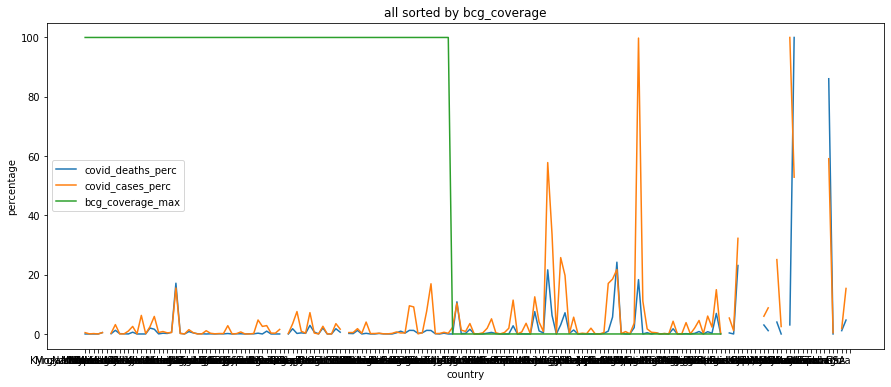

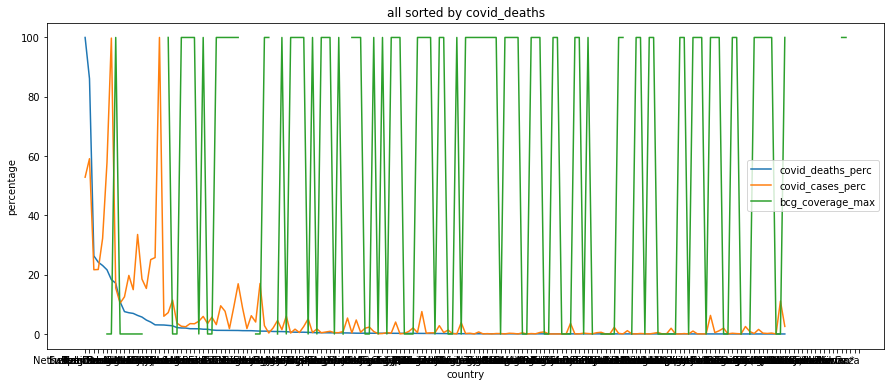

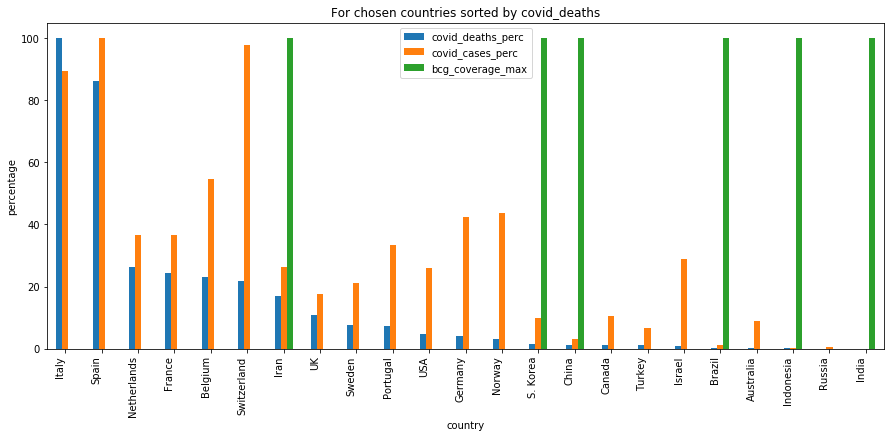

In [10]:
#plot chart
df1=covid_bcg.sort_values('bcg_coverage_max',ascending=False)
plotCovid(df1,"all sorted by bcg_coverage")

#plot chart
df1=covid_bcg.sort_values('covid_deaths_perc',ascending=False)
plotCovid(df1,"all sorted by covid_deaths")

#plot chart
df1=covid_bcg[covid_bcg['country'].isin(countryList)].sort_values('covid_deaths_perc',ascending=False)
plotCovid(df1,"For chosen countries sorted by covid_deaths",chartKind='bar')
